# Introduction

In this phase of the project, an exploratory analysis will be conducted to provide insight regarding the Census data used for the study. The ability or limitation of the data set to support the hypothesis will be evaluated. As a reminder, the hypothesis is that house prices and rent can be predicted by their response to changes in the housing market and socioeconomic trends.

The independent variables of interest are: (1) Home value and (2) Contractual rent. The dependent variables of interest are: 
- Number of housing units in the structure
- Vacancy rate
- Household income
- Employment status
- Educational attainment

Race will be included as a dependent variable, out of curiosity on its impact on the independent variables.

The data will be examined across the most recent years of available data from the Census and American Community Survey: 2010 through 2015 and focus will be placed on 3 cities: Cleveland, Boston and Brooklyn. PUMA (Public Use Microdata Area) codes are the most detailed geographic identifier in the data set; PUMA codes will be used to aggregate data for analysis in this study. 

Attempts to access the data using API connections were unsuccessful. As an alternative, the data is downloaded from the ["IPUMS website"](https://usa.ipums.org/usa/).

In [132]:
# Import necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set file name to load, containing the data to be analyzed
file_name = r"C:\Users\michael.wong\Desktop\GADataScience\Final Project\usa_00008.dat"

# The data set used in this analysis was limited to 2015, due to the large file size across multiple years. 
# It is assumed the range of values is similar across years of the surveys.

In [133]:
# nrows = 100

In [134]:
# The file is downloaded in fixed width format
# The specifications provide the start and end position for each variable and the variable name
colspecs = [(0,4),(4,6),(6,14),(14,16),(16,26),(26,28),(28,30),(30,34),(34,37),(37,41),(41,46),(46,50),(50,51),
            (51,55),(55,59),(59,66),(66,73),(73,74),(74,76),(76,77),(77,78),(78,79),(79,80),(80,81),(81,82),
            (82,86),(86,96),(96,97),(97,100),(100,102),(102,105),(105,106),(106,108),(108,109),(109,113),(113,116)]
names = ['YEAR','DATANUM','SERIAL','NUMPREC','HHWT','STATEICP','STATEFIP','COUNTY','COUNTYFIPS','CITY',
         'PUMA','CPUMA0010','GQ','RENT','RENTGRS','HHINCOME','VALUEH','VACANCY','UNITSSTR','QRENT','QRENTGRS',
         'QVALUEH','QVACANCY','QUNITSST','QHHINCOME','PERNUM','PERWT','RACE','RACED','EDUC','EDUCD','EMPSTAT',
         'EMPSTATD','LABFORCE','OCC2010','IND1990']

# Some extra variables, in addition to those intended for analysis have been included in case they may be useful later

In [135]:
data = pd.read_fwf(file_name, header=None, colspecs=colspecs, names=names)
#nrows=nrows removed

In [136]:
# A quick examination of the first row of data to check the fixed width columns have been interpreted correctly
a=data.iloc[0,]
print a

YEAR             2015
DATANUM             1
SERIAL              1
NUMPREC             4
HHWT             4800
STATEICP           41
STATEFIP            1
COUNTY            970
COUNTYFIPS         97
CITY                0
PUMA             2701
CPUMA0010          18
GQ                  1
RENT                0
RENTGRS             0
HHINCOME        52450
VALUEH        9999999
VACANCY             0
UNITSSTR            3
QRENT               0
QRENTGRS            0
QVALUEH             0
QVACANCY            0
QUNITSST            4
QHHINCOME           4
PERNUM              1
PERWT            4800
RACE                2
RACED             200
EDUC                5
EDUCD              50
EMPSTAT             1
EMPSTATD           10
LABFORCE            2
OCC2010          2040
IND1990           880
Name: 0, dtype: int64


In [137]:
# Select columns of interest for analysis
data_primary=data[['YEAR','NUMPREC','RENT','VALUEH','VACANCY','EMPSTAT','HHINCOME',
                   'EDUC','RACE','UNITSSTR','DATANUM','SERIAL','PERNUM','PUMA']]

In [138]:
data_primary.describe()

,YEAR,NUMPREC,RENT,VALUEH,VACANCY,EMPSTAT,HHINCOME,EDUC,RACE,UNITSSTR,DATANUM,SERIAL,PERNUM,PUMA
count,3147005.0,3.147005e+06,3.147005e+06,3.147005e+06,3147005.0,3.147005e+06,3.147005e+06,3.147005e+06,3.147005e+06,3.147005e+06,3147005.0,3.147005e+06,3.147005e+06,3.147005e+06
mean,2015.0,3.168544e+00,2.501390e+02,3.419357e+06,0.0,1.506561e+00,5.600916e+05,6.050968e+00,1.786637e+00,3.504605e+00,1.0,6.836987e+05,2.084272e+00,4.616182e+03
std,0.0,1.769318e+00,5.218459e+02,4.546492e+06,0.0,1.129809e+00,2.104676e+06,3.230814e+00,1.846057e+00,2.003032e+00,0.0,4.005719e+05,1.340448e+00,9.323847e+03
min,2015.0,1.000000e+00,0.000000e+00,1.000000e+03,0.0,0.000000e+00,-1.640000e+04,0.000000e+00,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+02
25%,2015.0,2.000000e+00,0.000000e+00,1.500000e+05,0.0,1.000000e+00,3.760000e+04,4.000000e+00,1.000000e+00,3.000000e+00,1.0,3.332280e+05,1.000000e+00,9.000000e+02
50%,2015.0,3.000000e+00,0.000000e+00,3.400000e+05,0.0,1.000000e+00,7.123000e+04,6.000000e+00,1.000000e+00,3.000000e+00,1.0,6.838670e+05,2.000000e+00,2.200000e+03
75%,2015.0,4.000000e+00,1.900000e+02,9.999999e+06,0.0,3.000000e+00,1.250000e+05,8.000000e+00,1.000000e+00,3.000000e+00,1.0,1.032830e+06,3.000000e+00,4.101000e+03
max,2015.0,2.000000e+01,4.000000e+03,9.999999e+06,0.0,3.000000e+00,9.999999e+06,1.100000e+01,9.000000e+00,1.000000e+01,1.0,1.375481e+06,2.000000e+01,7.030100e+04


### Create reference tables to map index keys to meaninful text

In [139]:
VACANCY = {
    0:"N/A",
    1:"For rent or sale",
    2:"For sale only",
    3:"Rented or sold but not (yet) occupied",
    4:"For seasonal, recreational or other occasional use",
    5:"For occasional use",
    6:"For seasonal use",
    7:"For migrant farm workers",
    8:"For seasonal use or migratory",
    9:"Other vacant"}

In [140]:
UNITSSTR ={
    0:"N/A",
    1:"Mobile home or trailer",
    2:"Boat, tent, van, other",
    3:"1-family house, detached",
    4:"1-family house, attached",
    5:"2-family building",
    6:"3-4 family building",
    7:"5-9 family building",
    8:"10-19 family building",
    9:"20-49 family building",
    10:"50+ family building"}

In [141]:
RACE = {
    1:"White",
    2:"Black/African American/Negro",
    3:"American Indian or Alaska Native",
    4:"Chinese",
    5:"Japanese",
    6:"Other Asian or Pacific Islander",
    7:"Other race, nec",
    8:"Two major races",
    9:"Three or more major races"}

In [142]:
EDUC={
    0:"N/A or no schooling",
    1:"Nursery school to grade 4",
    2:"Grade 5, 6, 7, or 8",
    3:"Grade 9",
    4:"Grade 10",
    5:"Grade 11",
    6:"Grade 12",
    7:"1 year of college",
    8:"2 years of college",
    9:"3 years of college",
    10:"4 years of college",
    11:"5+ years of college"}

In [143]:
EMPSTAT ={
    0:"N/A",
    1:"Employed",
    2:"Unemployed",
    3:"Not in labor force"}

In [144]:
# Map index keys and store mapped values
dp=data_primary.replace({'VACANCY': VACANCY,'UNITSSTR': UNITSSTR, 'RACE': RACE,'EDUC': EDUC,'EMPSTAT': EMPSTAT})

In [145]:
dp.head()

,YEAR,NUMPREC,RENT,VALUEH,VACANCY,EMPSTAT,HHINCOME,EDUC,RACE,UNITSSTR,DATANUM,SERIAL,PERNUM,PUMA
0,2015,4,0,9999999,N/A,Employed,52450,Grade 11,Black/African American/Negro,"1-family house, detached",1,1,1,2701
1,2015,4,0,9999999,N/A,Not in labor force,52450,1 year of college,Black/African American/Negro,"1-family house, detached",1,1,2,2701
2,2015,4,0,9999999,N/A,N/A,52450,Nursery school to grade 4,Black/African American/Negro,"1-family house, detached",1,1,3,2701
3,2015,4,0,9999999,N/A,Employed,52450,1 year of college,Black/African American/Negro,"1-family house, detached",1,1,4,2701
4,2015,1,210,9999999,N/A,Not in labor force,8800,"Grade 5, 6, 7, or 8",Two major races,2-family building,1,2,1,1000


The continuous variables are: 
- RENT (contractual rent)
- VALUEH (home value)
- HHINCOME (household income)

### RENT
There are a significant number of '0's in the data (~75%), indicating lack of response for the household ("N/A"). Of the responding households, ~15% pay less than 500, ~45% pay between 500 and 1000, 35% pay between 1000 and 2000 and the remaining ~5% pay over 2000. However, given the scarcity of responses - I will have to identify a separate source of rent data, possibly Zillow. An examination of the full set of responses across 2010-15 may provide more samples on which to train and test. Whether this is sufficient will be discovered in later phases. Alternatively, the study may be limited to home value for the current effort.

### VALUEH
One third of responses were '9999999', the "N/A" value for this data; most likely because most homeowners may not know or want to disclose the value of their home. Of the valid responses, more than half of homes were estimated to be 200k or less, more than a quarter were 200k to 400k and the remaining (~20%) were valued above 400k. This distribution will likely change significantly in urban areas where home appreciation has outpaced that of more rural areas. 

### HHINCOME
Only 5% of responses were '9999999', the "N/A" value for this data. The remaining data may be used as an indicator of home value and rent. The majority or responding households have an income of less than 100,000 dollars. 

All three variables show high degree of skewness and VALUEH and HHINCOME also show a high degree of kurtosis. All values are skewed toward the lower end of values, with a long tail toward the higher end of values. VALUEH and HHINCOME have very skinny, peaked distribution. This means that for homeowners (households) in the sample population, the majority of homes and incomes are very similar in nature, where most people make similar incomes and buy similar value homes. Rent appears to vary more, with less "peaky" distribution and more values in lower and higher end of the markets. 

Scatterplots provide a similar outcome, where the majority of homeowners are cluster (with dots overlapping to a high degree) in the left hand corner of the plot.

This means that there are likely to be a fair number of households who make the same income, but that their choice of rent determines whether they are saving money or just getting by. This data will be interesting to see when we drill down into the three specific urban areas and specific neighborhoods.

In [194]:
dp.RENT.value_counts(bins=25)

(-4.001, 160.0]     2355714
(640.0, 800.0]       138236
(480.0, 640.0]       117953
(800.0, 960.0]        94563
(960.0, 1120.0]       81566
(320.0, 480.0]        76114
(1280.0, 1440.0]      61466
(1440.0, 1600.0]      44042
(160.0, 320.0]        42835
(1120.0, 1280.0]      41800
(1760.0, 1920.0]      22418
(1600.0, 1760.0]      14267
(2080.0, 2240.0]      10966
(1920.0, 2080.0]      10497
(2240.0, 2400.0]       8714
(2400.0, 2560.0]       5139
(2560.0, 2720.0]       5091
(2880.0, 3040.0]       4408
(3040.0, 3200.0]       3040
(3680.0, 3840.0]       2382
(2720.0, 2880.0]       2149
(3200.0, 3360.0]       1832
(3360.0, 3520.0]       1590
(3840.0, 4000.0]        118
(3520.0, 3680.0]        105
Name: RENT, dtype: int64

In [172]:
dp.VALUEH.value_counts(bins=25)

(-8999.0, 400959.96]        1745812
(9600039.04, 9999999.0]     1013364
(400959.96, 800919.92]       287985
(800919.92, 1200879.88]       53518
(1200879.88, 1600839.84]      14836
(1600839.84, 2000799.8]       13099
(2400759.76, 2800719.72]       6878
(3200679.68, 3600639.64]       3264
(2000799.8, 2400759.76]        2540
(5200479.48, 5600439.44]       2327
(2800719.72, 3200679.68]       1614
(4800519.52, 5200479.48]       1333
(4000599.6, 4400559.56]         365
(3600639.64, 4000599.6]          70
(8800119.12, 9200079.08]          0
(8400159.16, 8800119.12]          0
(9200079.08, 9600039.04]          0
(5600439.44, 6000399.4]           0
(6000399.4, 6400359.36]           0
(6400359.36, 6800319.32]          0
(6800319.32, 7200279.28]          0
(7200279.28, 7600239.24]          0
(7600239.24, 8000199.2]           0
(8000199.2, 8400159.16]           0
(4400559.56, 4800519.52]          0
Name: VALUEH, dtype: int64

In [188]:
dp.VALUEH = dp.VALUEH.replace({9999999.0: np.nan})

In [190]:
dp.HHINCOME = dp.HHINCOME.replace({9999999.0: np.nan})

In [195]:
dp.RENT = dp.RENT.replace({0: np.nan})

In [197]:
dp.describe()

,YEAR,NUMPREC,RENT,VALUEH,HHINCOME,DATANUM,SERIAL,PERNUM,PUMA
count,3147005.0,3.147005e+06,810910.000000,2.133641e+06,2.998252e+06,3147005.0,3.147005e+06,3.147005e+06,3.147005e+06
mean,2015.0,3.168544e+00,970.747309,2.939088e+05,9.174719e+04,1.0,6.836987e+05,2.084272e+00,4.616182e+03
std,0.0,1.769318e+00,597.755662,3.900134e+05,9.463116e+04,0.0,4.005719e+05,1.340448e+00,9.323847e+03
min,2015.0,1.000000e+00,4.000000,1.000000e+03,-1.640000e+04,1.0,1.000000e+00,1.000000e+00,1.000000e+02
25%,2015.0,2.000000e+00,570.000000,1.100000e+05,3.600000e+04,1.0,3.332280e+05,1.000000e+00,9.000000e+02
50%,2015.0,3.000000e+00,830.000000,2.000000e+05,6.800000e+04,1.0,6.838670e+05,2.000000e+00,2.200000e+03
75%,2015.0,4.000000e+00,1200.000000,3.500000e+05,1.140000e+05,1.0,1.032830e+06,3.000000e+00,4.101000e+03
max,2015.0,2.000000e+01,4000.000000,5.567000e+06,2.100000e+06,1.0,1.375481e+06,2.000000e+01,7.030100e+04


In [220]:
dp.skew()

YEAR        0.000000
NUMPREC     1.275237
RENT        1.480259
VALUEH      6.234268
HHINCOME    3.588849
DATANUM     0.000000
SERIAL      0.010785
PERNUM      1.762743
PUMA        4.506265
dtype: float64

In [221]:
dp.kurt()

YEAR         0.000000
NUMPREC      3.594009
RENT         3.009130
VALUEH      60.332877
HHINCOME    21.988185
DATANUM      0.000000
SERIAL      -1.225192
PERNUM       5.137902
PUMA        20.768426
dtype: float64

More than 3 million people were included in the 2015 survey (~1% of Americans). The majority (>90%) of households surveyed are small households (5 or less people), accounting for individuals, couples and small families who live together. This means the home values and rents will be representative of this segment of American communities.

In [156]:
dp.VACANCY.value_counts()

N/A    3147005
Name: VACANCY, dtype: int64

Vacancy data is not available for 2015 - I will look for other data points to indicate vacancy across the survey data. Or this may mean that the study cannot include vacancy as a dependent variable.

In [158]:
dp.EMPSTAT.value_counts()

Employed              1442336
Not in labor force    1039971
N/A                    575245
Unemployed              89453
Name: EMPSTAT, dtype: int64

18% of respondents did not indicate employment status. Of the 82% (2.6 million) who did, 56% are actively employed, 3% are unemployed and 40% are not actively in the labor market. The degree that local employment figures differ amongst different areas may impact housing price and rent predictions.

In [159]:
dp.EDUC.value_counts()

Grade 12                     934905
4 years of college           443798
1 year of college            388077
5+ years of college          272829
Nursery school to grade 4    245605
Grade 5, 6, 7, or 8          223870
2 years of college           196828
N/A or no schooling          193050
Grade 11                      91145
Grade 10                      82972
Grade 9                       73926
Name: EDUC, dtype: int64

Nearly half of individuals in households surveyed have completed high school (48%), while roughly a quarter (23%) have completed 4 or more years of college, and the remainder are attending / have not completed high school. Educational attainment, like employment status, can be compared across geographic areas to determine impact on housing price and rent predictions. The correlation between educational attainment and employment status, as well as household income, needs to be examined carefully to determine if the variables are sufficiently independent.

In [160]:
dp.RACE.value_counts()

White                               2413345
Black/African American/Negro         327549
Other race, nec                      116026
Other Asian or Pacific Islander      115345
Two major races                       81050
Chinese                               40671
American Indian or Alaska Native      34503
Three or more major races             10672
Japanese                               7844
Name: RACE, dtype: int64

77% of the sample population is white. This is higher than the reported 2010 Census (72.4%) and criticisms of the census process include under-representation of immigrant and minority communities. Therefore, the figures obtained for race need to be used with caution. However, it would be interesting to look at race as a predictor of housing price and rent. It is likely to be a significant factor, based on my limited knowledge (from reading news articles).

In [161]:
dp.UNITSSTR.value_counts()

1-family house, detached    2156384
Mobile home or trailer       172366
1-family house, attached     161601
N/A                          148753
3-4 family building           96349
5-9 family building           90984
2-family building             88081
50+ family building           87757
10-19 family building         79284
20-49 family building         63281
Boat, tent, van, other         2165
Name: UNITSSTR, dtype: int64

Nearly 70% of households in the sample reside in single family detached homes. When drilling down on the urban areas of Cleveland, Boston and Brooklyn, the distribution is likely to change dramatically with the prevalence of dense housing structures. I do not have expectations for the impact of housing type / number of units on predictions.

In [218]:
a=dp['HHINCOME']
b=dp['RENT']
c=dp['VALUEH']
d=dp[['VALUEH','RENT','HHINCOME']]

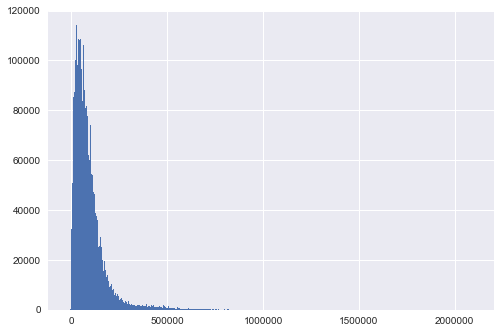

In [210]:
a.hist(bins = 500);
plt.show();

In [234]:
e = data[['RENT','VALUEH','EMPSTAT','HHINCOME','EDUC','RACE','UNITSSTR']]

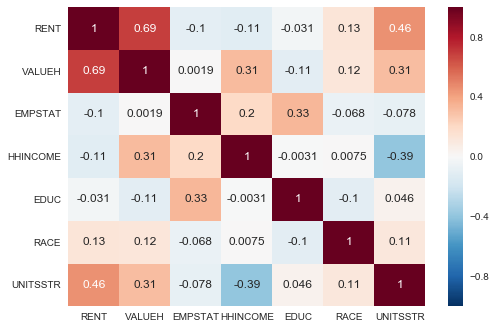

In [227]:
sns.heatmap(e.corr(), annot=True);
plt.show();

Not surprisingly, our two independent variables, RENT and VALUEH (rent and home value) are strongly correlated. Rent correlates well also with UNITSSTR (number of units in the building) and home values correlate well with HHINCOME (household income) and UNITSSTR. The low correlations are surprising and in order to build a model with good prediction performance, additional variables may need to be included. It is possible the correlations will change if we focus in on the areas of interest, Cleveland, Boston, and Brooklyn.